<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/MeanShift%20Clustering-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 코드 출처 : 파이썬 머신러닝 완벽 가이드 (위키북스, 2020)
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt

In [ ]:
# 클러스터링 테스트를 위한 임의 데이터를 생성한다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

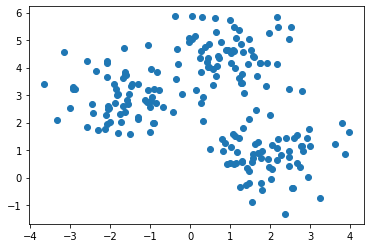

In [ ]:
# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


In [ ]:
# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

# Mean Shift Clustering
meanshift= MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [ ]:
clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

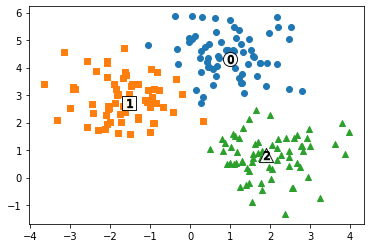

In [ ]:
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)
    
plt.show()